# Correlation analysis

In this notebook we study the correlation between the burned area during the fire season's months and some climate indexes for each pixel.

First, we consider the correlation between the sum of the burned area of the fire season's months and the average of the indexes in these months. We apply that to the unimodal fire seasons and then to the main fire season of the bimodal fire seasons.

Finally, we have a look to the correlation month by month. In other words, we study correlation between burned area of each fire season's month and the value of the indexes in this month.

We consider the following climate indexes: NAO, EA, WP, EP/NP, PNA, EA/WR, SCAND, POL, NINO3.4, ONI, SOI, but at the end we do not use SOI, ONI and EP/NP.

We use the functions defined in the file *correlation_functions.R*

In [53]:
setwd("..")
source("scripts/correlation_functions.R")

Loading objects:
  coast.lines
Loading objects:
  masked_coords
  dates
  masked_ba_series
Loading objects:
  fireSeasonPer75_def


## Data loading

We check that all the indexes have been standarised used the period between 1981 and 2010. NINA34 and ONI have not, so we standarise them.

In [6]:
nina34 = read.table("CPC/nina34.anom.data.txt", skip = 3, nrows = 72)
colnames(nina34) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
nina34[,-1] = (nina34[,-1] - mean(as.matrix(nina34[32:61,-1]))) / sd(as.matrix(nina34[32:61,-1]))

In [7]:
oni = read.table("CPC/oni.data", skip = 1, nrows = 72, 
                    col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
oni[,-1] = (oni[,-1] - mean(as.matrix(oni[32:61,-1]))) / sd(as.matrix(oni[32:61,-1]))

In [8]:
nao = read.table("CPC/nao_index.tim.txt", skip = 8, header = T)
nao <- nao %>% spread(MONTH,INDEX)
colnames(nao) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(nao[32:61,-1]))
sd(as.matrix(nao[32:61,-1]))

[1] 8.333333e-05

[1] 1.001653

In [9]:
poleur = read.table("CPC/poleur_index.tim", skip = 8, header = T)
poleur <- poleur %>% spread(MONTH,INDEX)
colnames(poleur) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(poleur[32:61,-1]))
sd(as.matrix(poleur[32:61,-1]))

[1] 0.0001388889

[1] 1.001456

In [10]:
ea = read.table("CPC/ea_index.tim.txt", skip = 8, header = T)

ea <- ea %>% spread(MONTH,INDEX)
colnames(ea) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(ea[32:61,-1]))
sd(as.matrix(ea[32:61,-1]))

[1] -0.0001388889

[1] 1.001423

In [11]:
eawr = read.table("CPC/eawr_index.tim.txt", skip = 8, header = T)
eawr <- eawr %>% spread(MONTH,INDEX)
colnames(eawr) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(eawr[32:61,-1]))
sd(as.matrix(eawr[32:61,-1]))

[1] -0.0001666667

[1] 1.001118

In [12]:
# falta dec
epnp = read.table("CPC/epnp_index.tim.txt", skip = 8, header = T)
epnp <- epnp %>% spread(MONTH,INDEX)
colnames(epnp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(epnp[32:61,-c(1,13)]))
sd(as.matrix(epnp[32:61,-c(1,13)]))

[1] 0.0002121212

[1] 1.00141

In [13]:
pna = read.table("CPC/pna_index.tim.txt", skip = 8, header = T)
pna <- pna %>% spread(MONTH,INDEX)
colnames(pna) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(pna[32:61,-1]))
sd(as.matrix(pna[32:61,-1]))

[1] 0.0003333333

[1] 1.001209

In [14]:
scand = read.table("CPC/scand_index.tim.txt", skip = 8, header = T)
scand <- scand %>% spread(MONTH,INDEX)
colnames(scand) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(scand[32:61,-1]))
sd(as.matrix(scand[32:61,-1]))

[1] 2.777778e-05

[1] 1.001176

In [15]:
soi = read.table("CPC/soi.txt", skip = 88, ,nrows = 70,
                 col.names = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
mean(as.matrix(soi[31:60,-1]))
sd(as.matrix(soi[31:60,-1]))

[1] 0.001388889

[1] 1.000069

In [16]:
wp = read.table("CPC/wp_index.tim.txt", skip = 8, header = T)
wp <- wp %>% spread(MONTH,INDEX)
colnames(wp) = c("Year", 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec')
mean(as.matrix(wp[32:61,-1]))
sd(as.matrix(wp[32:61,-1]))

[1] 0.0003055556

[1] 1.001415

Warning message:
"package 'psych' was built under R version 3.6.3"

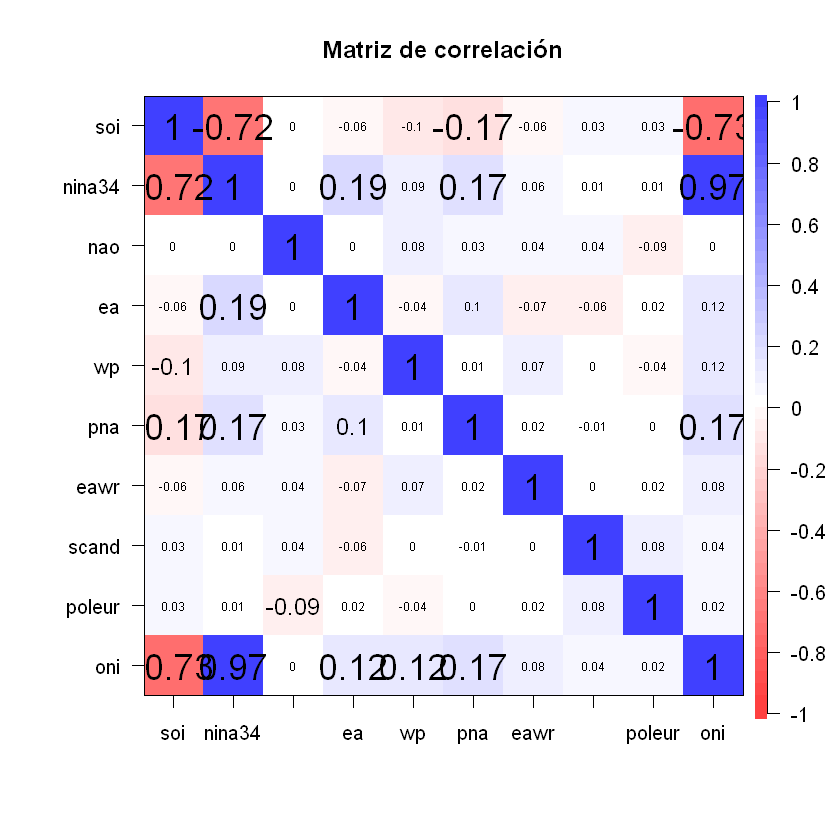

In [13]:
l = list(nina34, nao, ea, wp, pna, eawr, scand, poleur, oni)
M = as.vector(t(as.matrix(soi[1:70,-1])))
for (i in 1:9){
    M = cbind(M, as.vector(t(as.matrix(l[[i]][2:71,-1]))))
}

library(psych)
colnames(M) = c('soi', 'nina34', 'nao', 'ea', 'wp', 'pna', 'eawr', 'scand', 'poleur', 'oni')
corPlot(M, cex = 1.2, main = "Matriz de correlación")

SOI, ONI and NINA34 are strongly correlated. Consequently, we only use the NINO34 index.


## Correlation per cluster

### Unimodal fire season

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

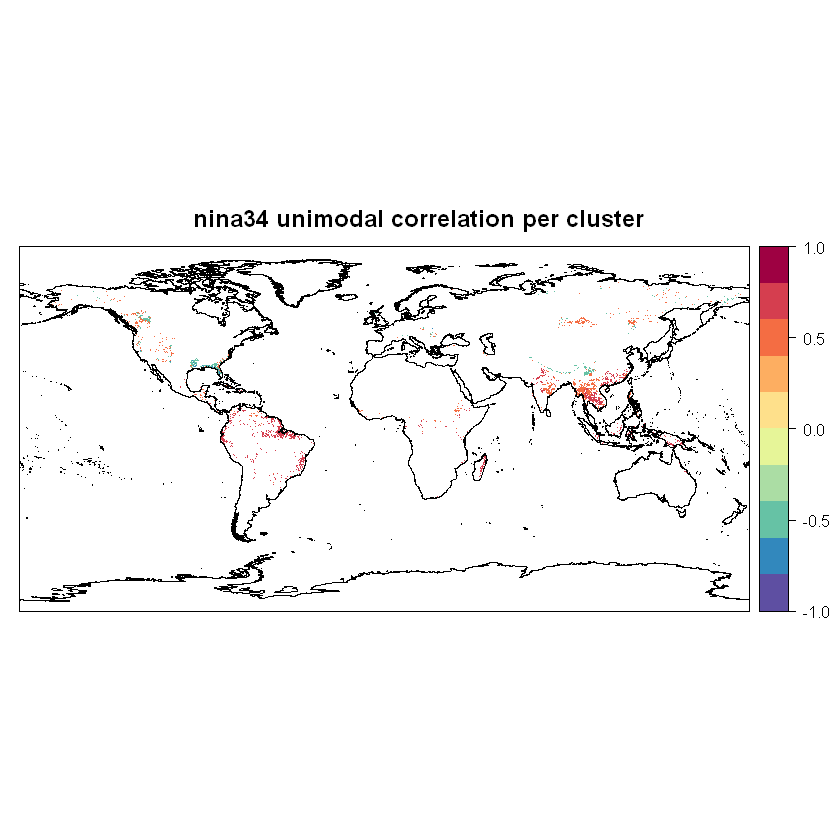

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

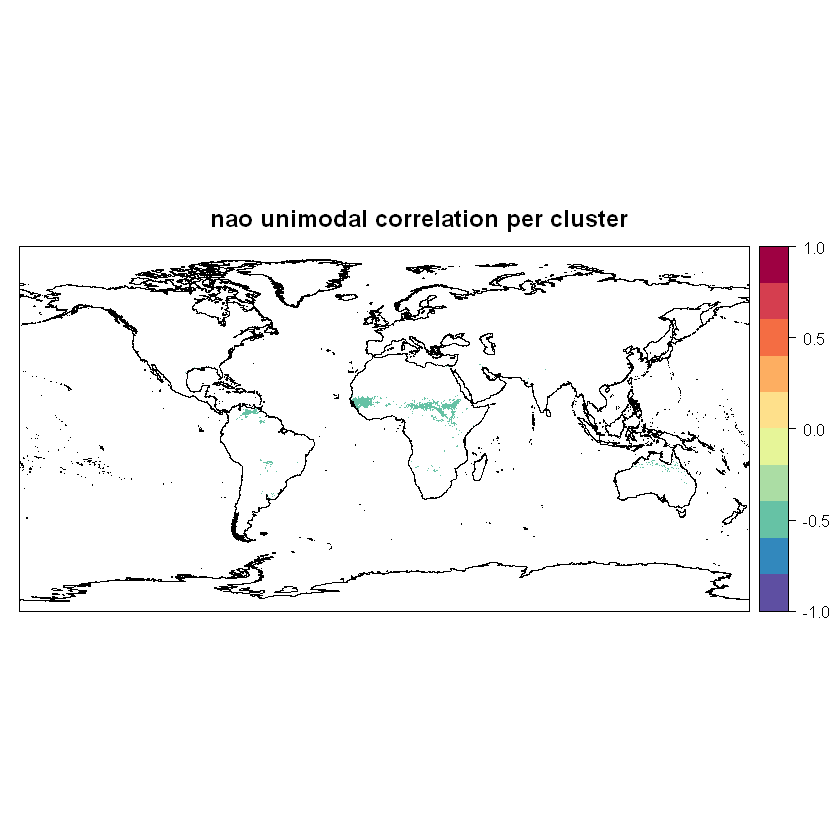

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

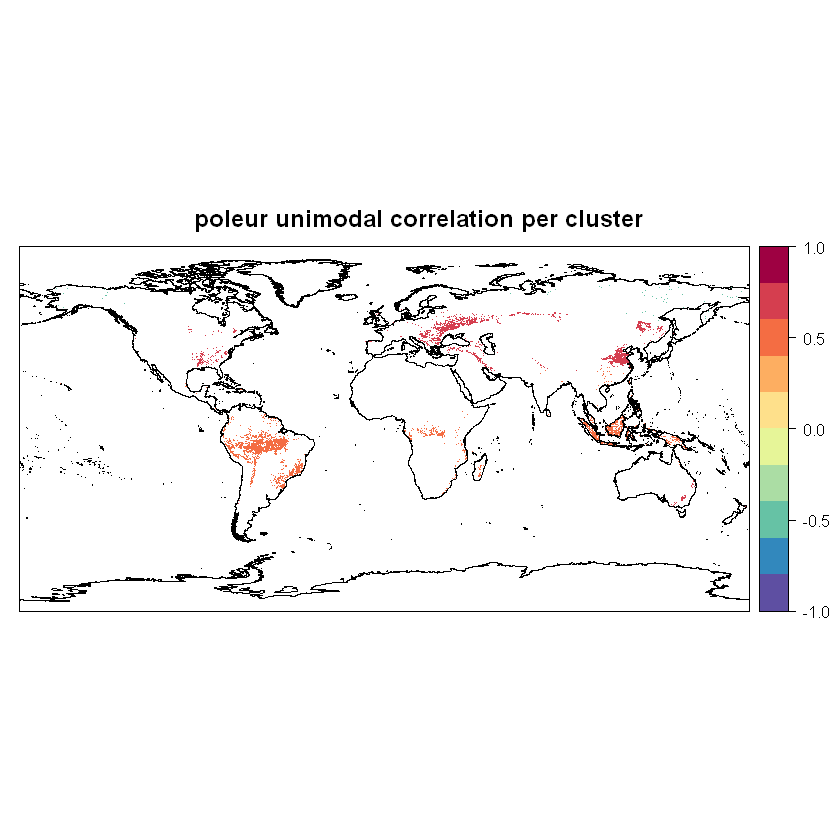

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

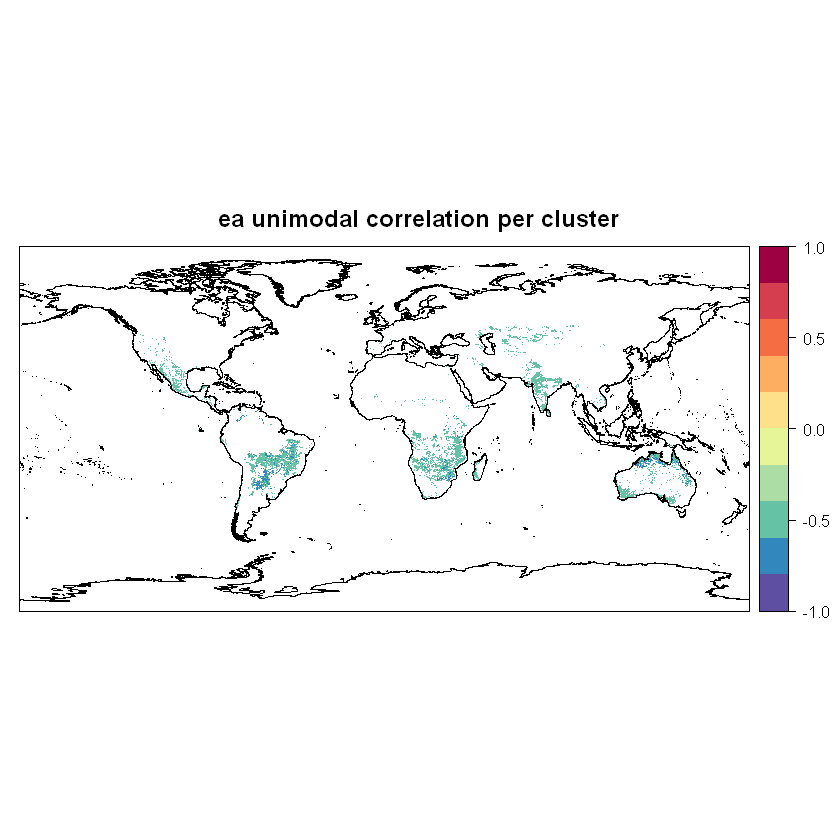

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

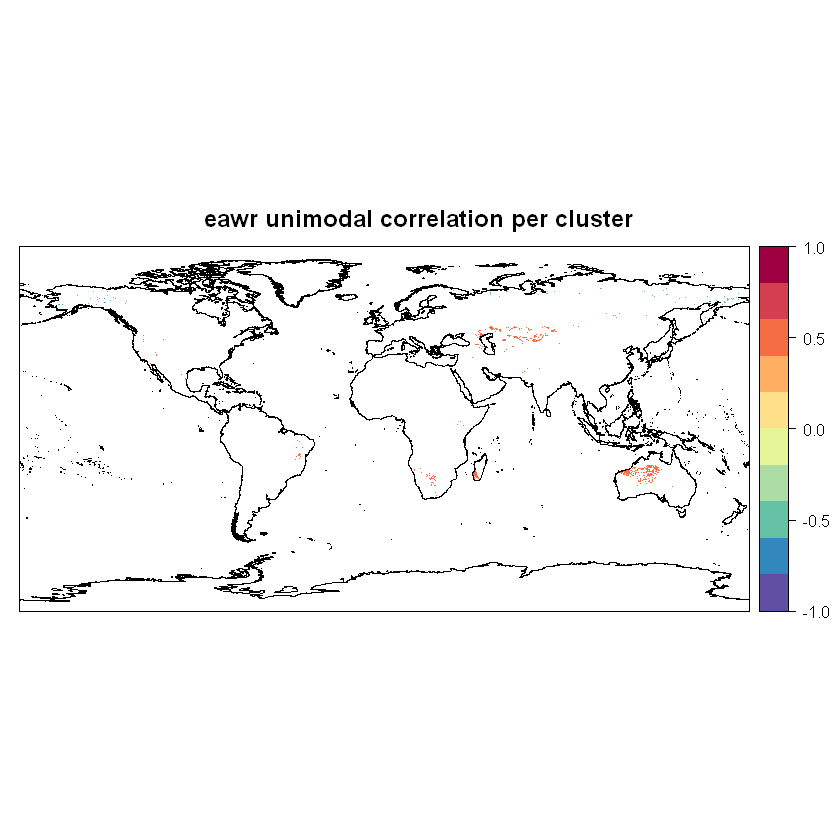

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

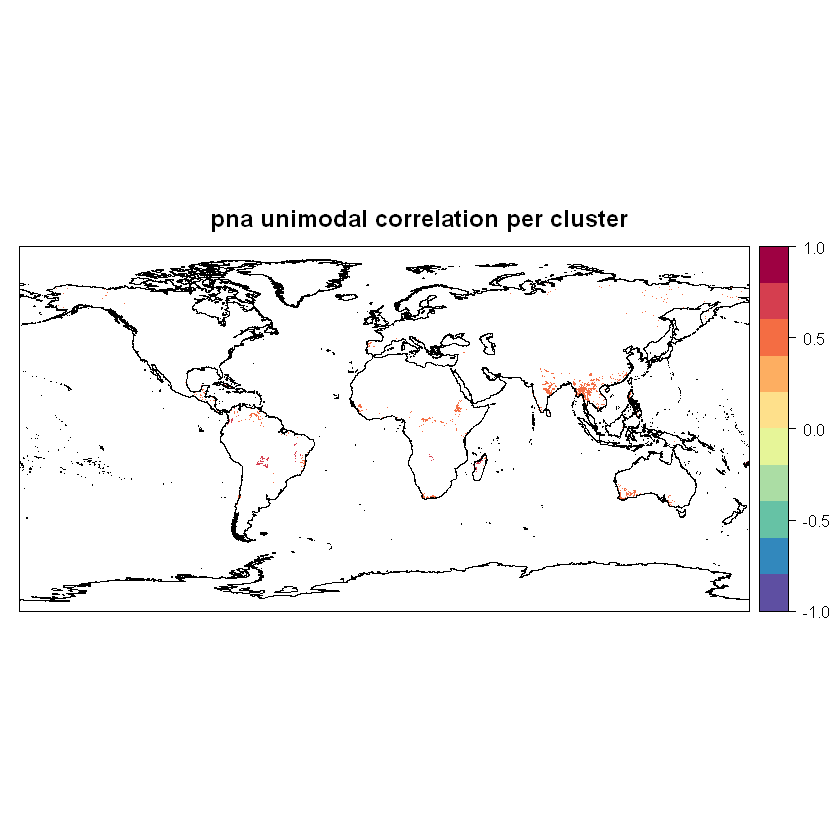

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

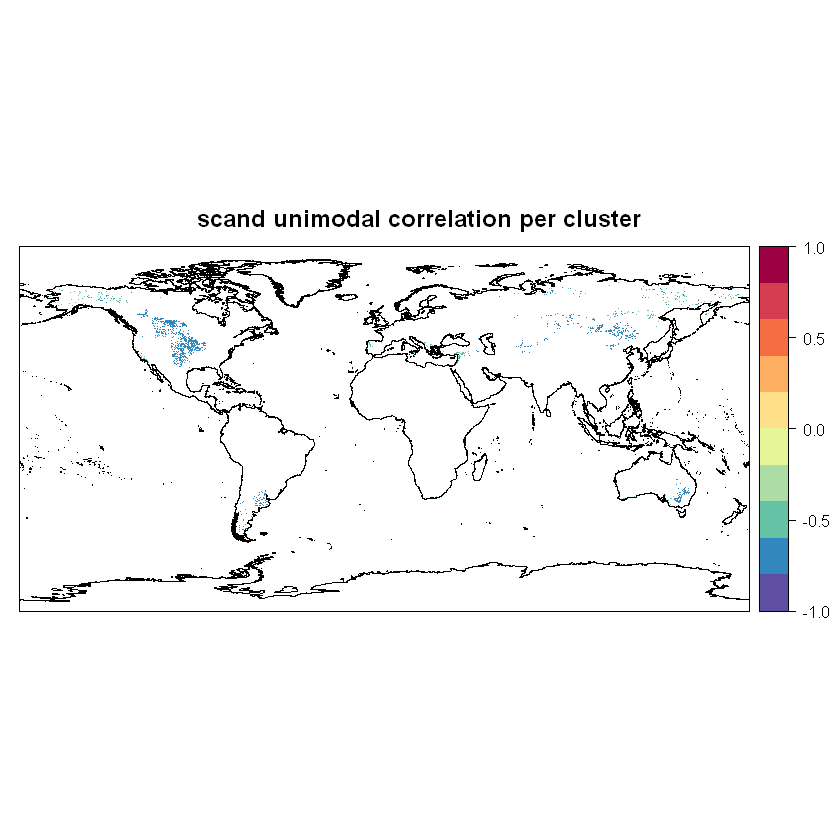

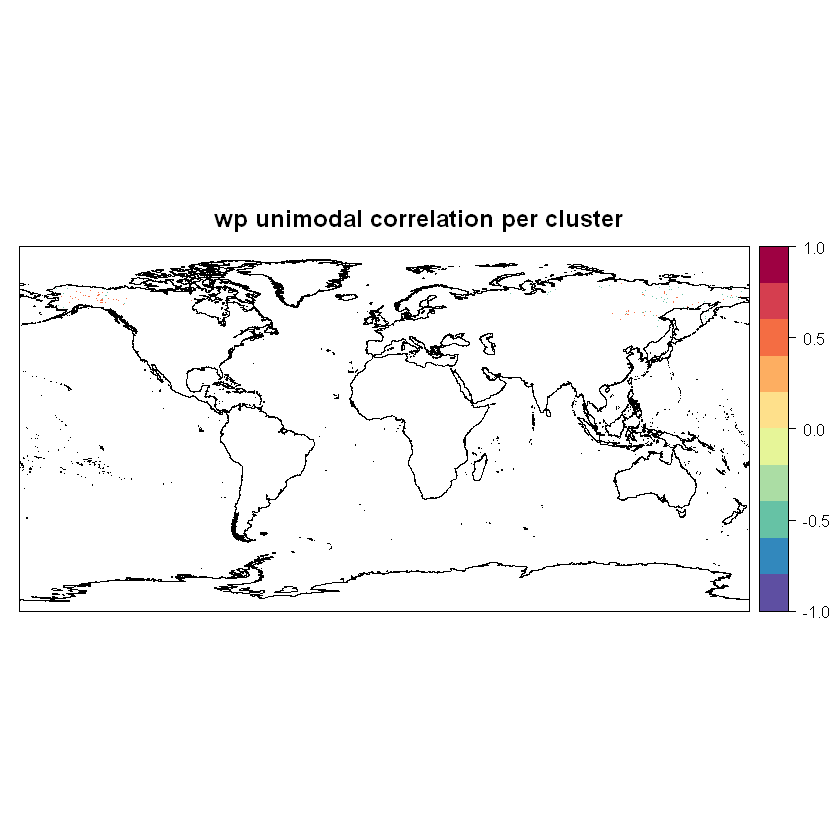

In [54]:
corr.df = masked_coords
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, nina34, 'nina34', corr.df, mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, nao, 'nao', corr.df, mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, poleur, 'poleur', corr.df, mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, ea, 'ea', corr.df, mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, eawr, 'eawr', corr.df, mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, pna, 'pna', corr.df, mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, scand, 'scand', corr.df, mode = 'unimodal')
corr.df = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, wp, 'wp', corr.df, mode = 'unimodal')

#save(corr.df, file = 'corrDfAnnualClus.Rdata')

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  32407 
Number of pixels correlated with more than  1  indexes  2368 
Number of pixels correlated with more than  2  indexes  144 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


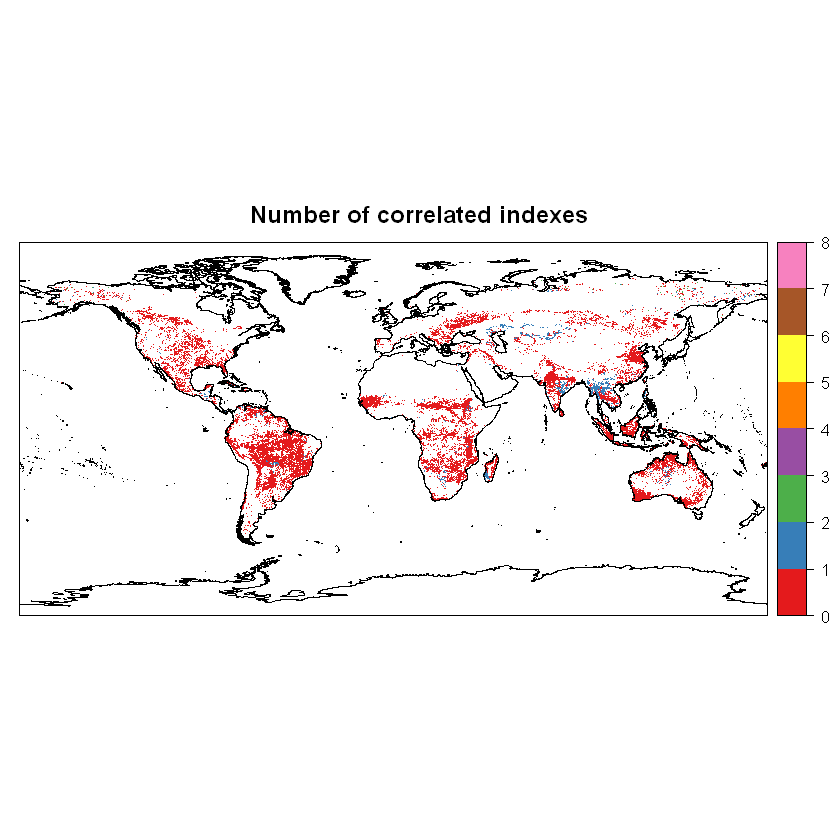

In [55]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df$nao.pvalue<0.05), as.numeric(corr.df$poleur.pvalue<0.05), as.numeric(corr.df$ea.pvalue<0.05),
          as.numeric(corr.df$eawr.pvalue<0.05), as.numeric(corr.df$pna.pvalue<0.05), as.numeric(corr.df$nina34.pvalue<0.05), 
          as.numeric(corr.df$scand.pvalue<0.05), as.numeric(corr.df$wp.pvalue<0.05))

corr.df$suma = rowSums(v, na.rm=T)
v <- corr.df$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df$suma > i-1), '\n')
}

### Main fire season of bimodals fire seasons

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

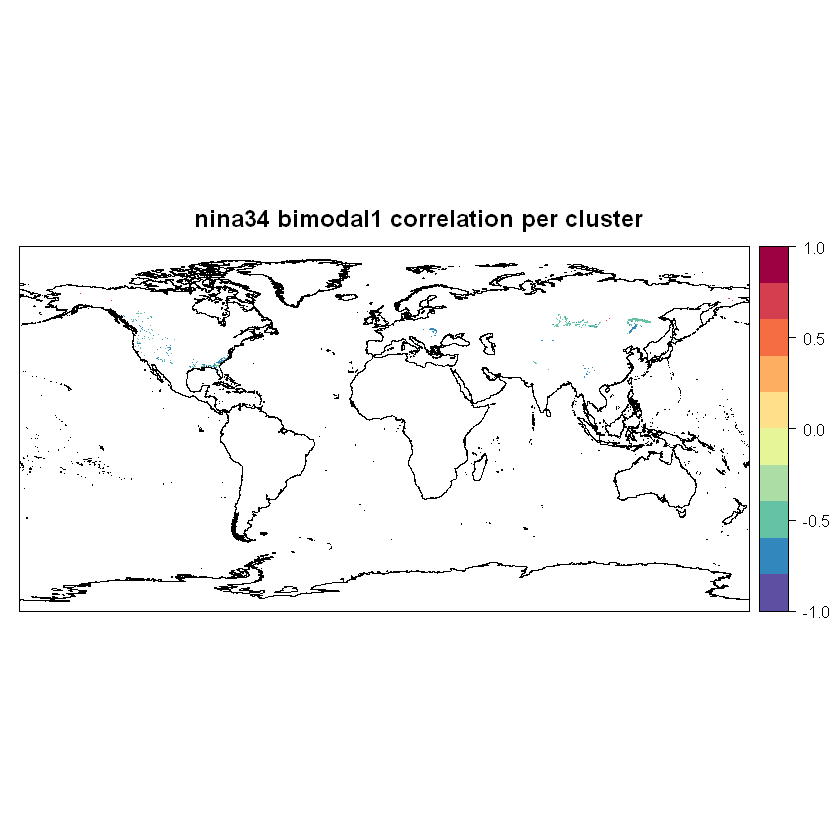

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

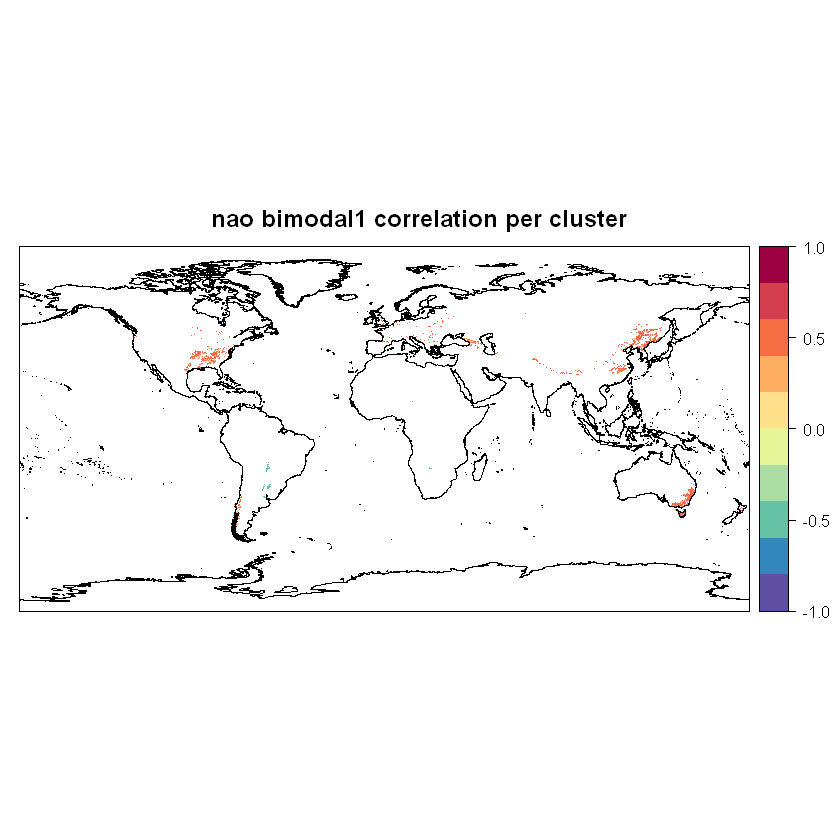

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

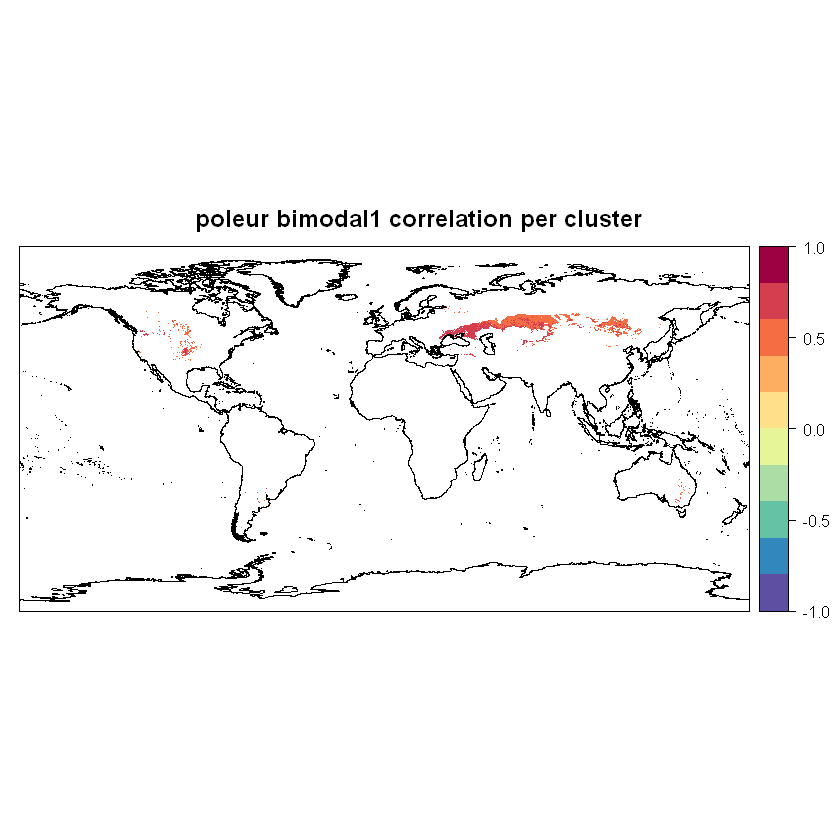

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

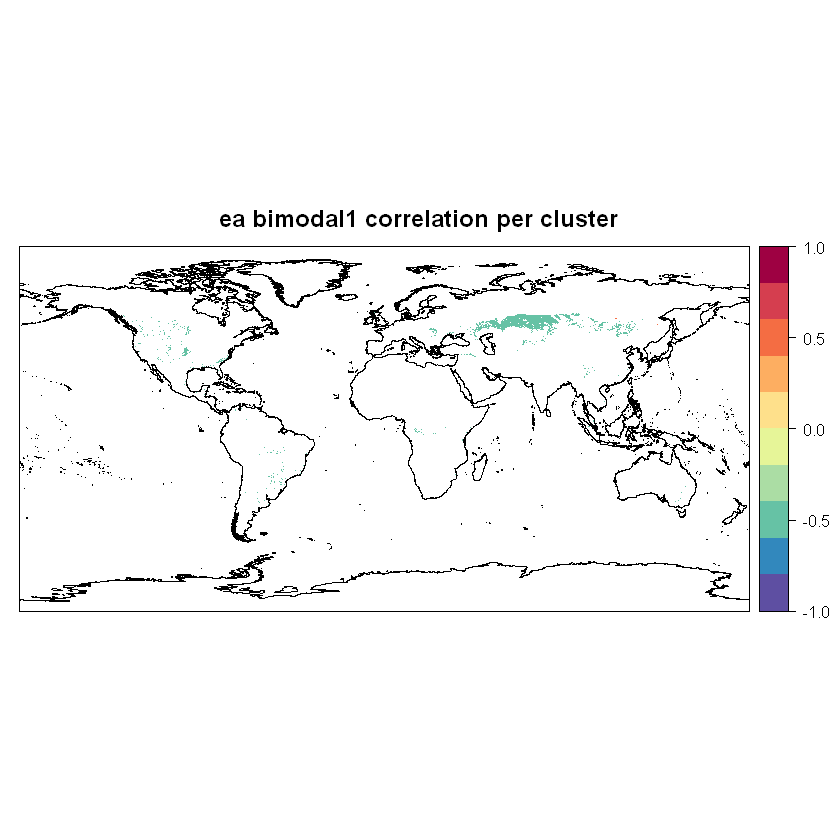

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

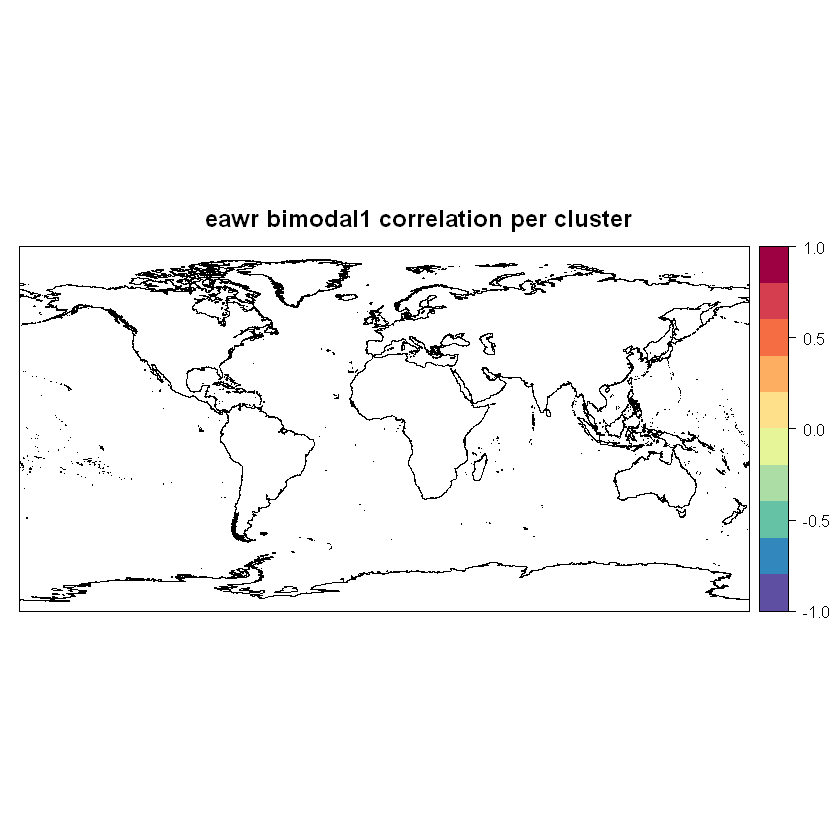

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

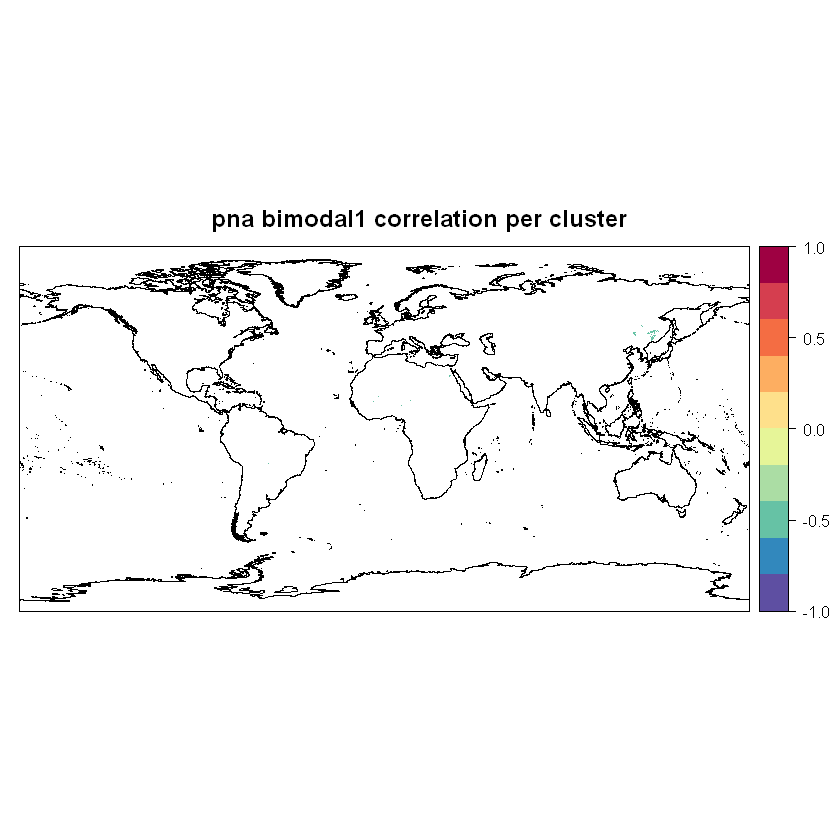

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"Warning message in min(x):
"ningún argumento finito para min; retornando Inf"Warning message in max(x):
"ningun argumento finito para max; retornando -Inf"

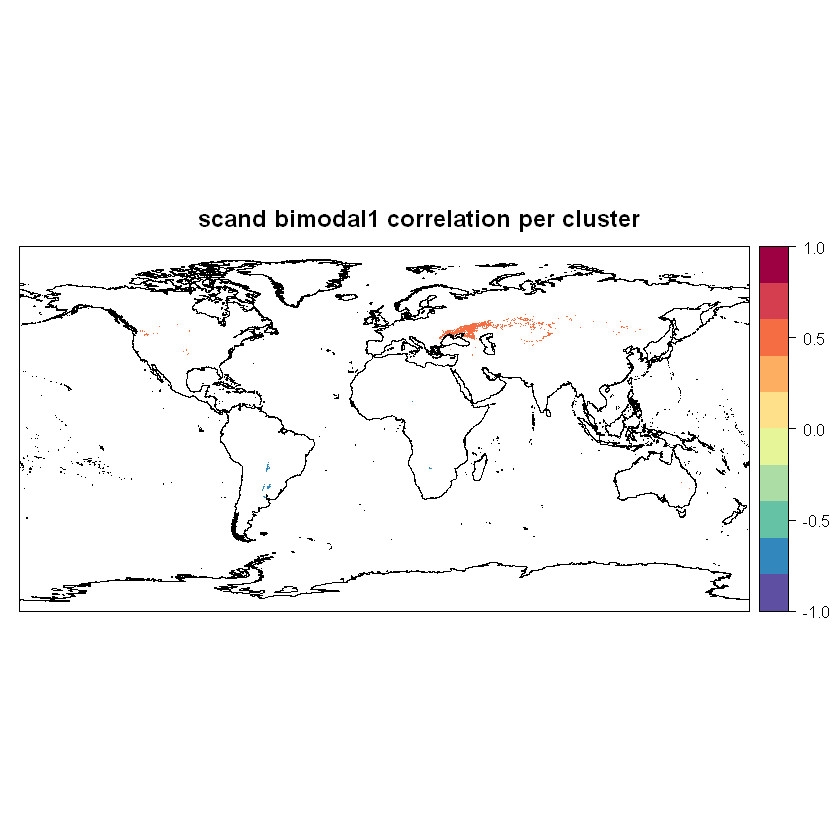

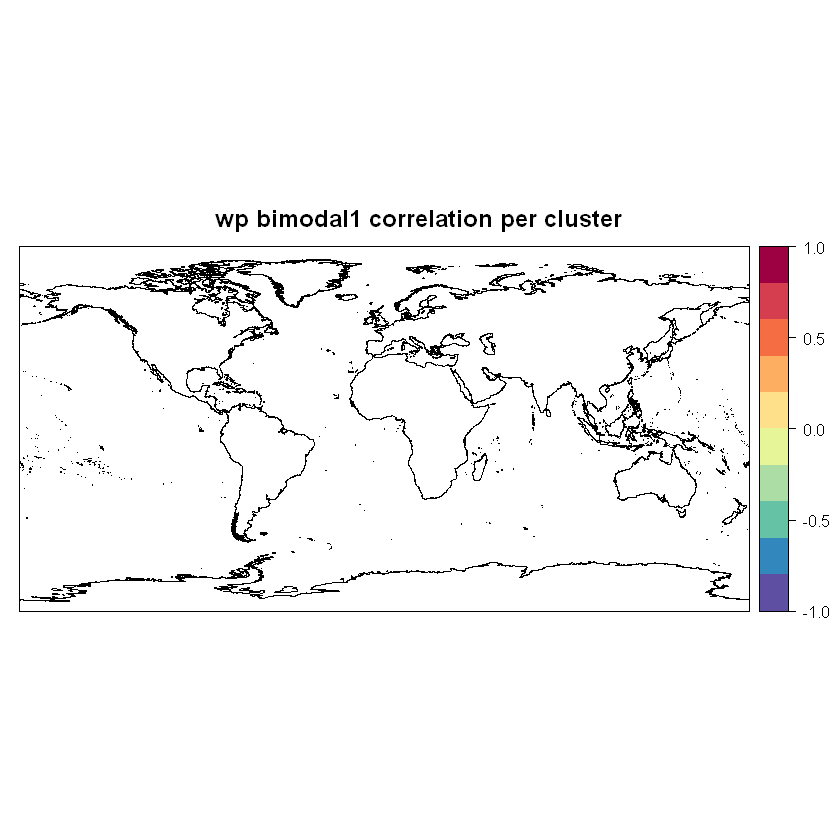

In [56]:
corr.df.2 = masked_coords
mode = 'bimodal1'
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, nina34, 'nina34', corr.df.2, mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, nao, 'nao', corr.df.2, mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, poleur, 'poleur', corr.df.2, mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, ea, 'ea', corr.df.2, mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, eawr, 'eawr', corr.df.2, mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, pna, 'pna', corr.df.2, mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, scand, 'scand', corr.df.2, mode = mode)
corr.df.2 = corr.annual.clus(log1p(masked_ba_series), fireSeasonPer75_def, wp, 'wp', corr.df.2, mode = mode)

Warning message in points2grid(points, tolerance, round):
"grid has empty column/rows in dimension 1"

Number of pixels correlated with more than  0  indexes  10524 
Number of pixels correlated with more than  1  indexes  5539 
Number of pixels correlated with more than  2  indexes  0 
Number of pixels correlated with more than  3  indexes  0 
Number of pixels correlated with more than  4  indexes  0 
Number of pixels correlated with more than  5  indexes  0 
Number of pixels correlated with more than  6  indexes  0 
Number of pixels correlated with more than  7  indexes  0 


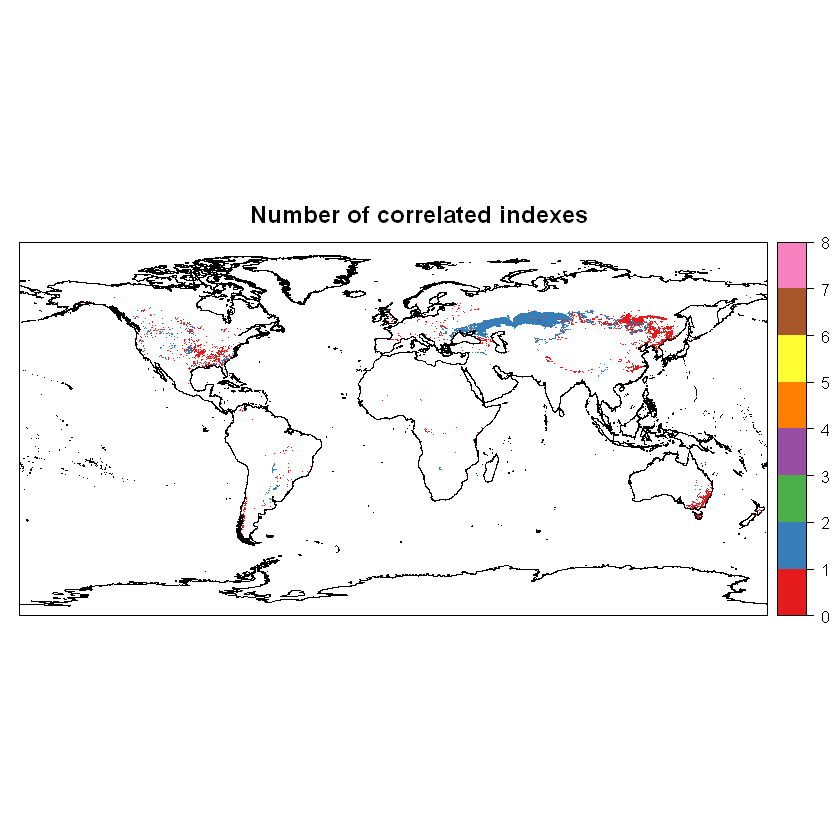

In [57]:
arg.list <- list(col.regions = brewer.pal(8, 'Set1'),
                          at = seq(0, 8, 1), main = 'Number of correlated indexes')

v = cbind(as.numeric(corr.df.2$nao.1.pvalue<0.05), as.numeric(corr.df.2$poleur.1.pvalue<0.05), as.numeric(corr.df.2$ea.1.pvalue<0.05),
          as.numeric(corr.df.2$eawr.1.pvalue<0.05), as.numeric(corr.df.2$pna.1.pvalue<0.05), as.numeric(corr.df.2$nina34.1.pvalue<0.05), 
          as.numeric(corr.df.2$scand.1.pvalue<0.05), as.numeric(corr.df.2$wp.1.pvalue<0.05))

corr.df.2$suma = rowSums(v, na.rm=T)
v <- corr.df.2$suma
v[which(v < 1)] <- NA

df1 <- cbind.data.frame(masked_coords, v)
coordinates(df1) <- c(1,2)
gridded(df1) <- TRUE
arg.list[["sp.layout"]] <- list("sp.lines", coast.lines)
arg.list[["obj"]] <- df1
arg.list[["zcol"]] <- 1
arg.list[["ylim"]] <- c(-90,90)
arg.list[["xlim"]] <- c(-180,180)
do.call("spplot", arg.list) %>% print()

for (i in 1:8){
    cat('Number of pixels correlated with more than ', i-1, ' indexes ', sum(corr.df.2$suma > i-1), '\n')
}